# What is an API?

- **API** stands for **Application Programming Interface** and is essentially a way for a database to share it's data with you (or others).

# Imports

In [1]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from hidden import meetup_api_key

Here’s a quick overview of these libraries:
- **urllib**: This module provides a high-level interface for fetching data from the World Wide Web.
- **json** (Java Script Object Notation): The json library can parse JSON from strings or files. The library parses JSON into a Python dictionary or list.
- **pandas**: It is used for structured data operations and manipulations. It is extensively used for data munging and preparation.
- **matplotlib**: It is used for plotting vast variety of graphs, starting from histograms to line plots to heat plots.

To access Meetup's API, we need an API key, which is different each user. Follow the steps below to find your key:

- Login into meetup.com. 
- Go to this link: https://secure.meetup.com/meetup_api/key/

# Generate list of urls for all cities (which act as the API call)

In [2]:
cities_dct = {
    'palo-alto' : ['CA', '94301'],
    'san-jose' : ['CA', '95113'],
    'portland' : ['OR', '97205'],
    'austin' : ['TX', '78701'],
    'denver' : ['CO', '80218'],
    'san-diego' : ['GA', '92007'],
    'washington' : ['DC', '20004'],
    'boston' : ['MA', '02201'],
    'san-francisco' : ['CA', '94102'],
    'seattle' : ['WA', '98121'],
    'atlanta' : ['WA', '30303'],
    'los-angeles' : ['CA', '90013'],
    'chicago' : ['IL', '60604'],
    'new-york' : ['NY', '10013'],
    'mountain-view' : ['CA', '94041'],
    'santa-monica' : ['GA', '90401'],
    'cambridge' : ['MA', '02138'],
    'salt-lake-city' : ['UT', '84111'],
    'raleigh' : ['NC', '27601'],
    'nashville' : ['TN', '37243'],
    'sunnyvale' : ['CA', '94086'],
    'boulder' : ['CO', '80302'],
    'irvine' : ['CA', '92614'],
    'philadelphia' : ['PA', '19107'],
    'dallas' : ['TX', '75201'],
    'bellevue' : ['WA', '98004'],
    'charlotte' : ['NC', '28202'],
    'Plano' : ['TX', '75074'],
    'Richmond' : ['VA', '23219'],    
}

# Write a function to make the necesary urls that we will use to call the API and recieve data

In [3]:
def make_meetup_urls(topic, meetup_api_key, radius=5.0):
    urls = []
    for city, info in zip(cities_dct.keys(), cities_dct.values()):
        state = info[0]
        zip_code = info[1]
        urls.append('https://api.meetup.com/2/groups?key=' + meetup_api_key + '&sign=true&photo-host=public&topic=' + topic + '&zip=' + zip_code + '&radius=' + str(radius) +  '&city=' + city + '&state=' + state +'&page=200')
    return urls

# Read data from URL and access relevant features in a DataFrame
Now, we have list of URLs for all cities. Next, we will use urllib library to read data into JSON format. Then, we’ll read the data to a list before converting it to a DataFrame.

In [4]:
def city_meetups(urls):
    for url in urls:
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        data=data["results"] #accessed data of results key only

        for i in data :
            city = i['city']
            country = i['country']
            rating = i['rating']
            name = i['name']
            members = i['members']
            
            result = {
            'city' : city,
            'country' : country,
            'rating' : rating,
            'name' : name,
            'members' : members,
            }
            yield result

# Wrap the above code in a function so that we can graph our results!

In [5]:
def plot_meetups_by_city(topic):
    urls = make_meetup_urls(topic, meetup_api_key)
    cities = list(city_meetups(urls))
    cities = pd.DataFrame(cities)
    # The line below will truncate the DataFrame back to the original cities. This can be useful because Meetup's API
    # will include other cities that are within the "radius" paramater passed into the API call
    cities = cities.loc[cities['city'].isin(['Palo Alto', 'San Jose', 'Portland', 'Austin', 'Denver', 'San Diego', 'Washington', 'Boston', 
                     'San Francisco', 'Seattle', 'Atlanta', 'Los Angeles', 'Chicago', 'New York', 'Mountain View',
                     'Santa Monica', 'Cambridge', 'Salt Lake City', 'Raleigh', 'Nashville', 'Sunnyvale', 'Boulder',
                     'Irvine', 'Philadelphia', 'Dallas', 'Bellevue', 
                     'Charlotte', 'Plano', 'Richmond'])]
    freq = cities.groupby('city').city.count() 
    fig = plt.figure(figsize=(28,6))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('City')
    ax1.set_ylabel('Count of Groups')
    ax1.set_title(f"Number of {topic} Meetup Groups")
    freq.plot(kind='bar') 

# Now, let's make some bar charts for the number of meetups in each city!

# Data Science

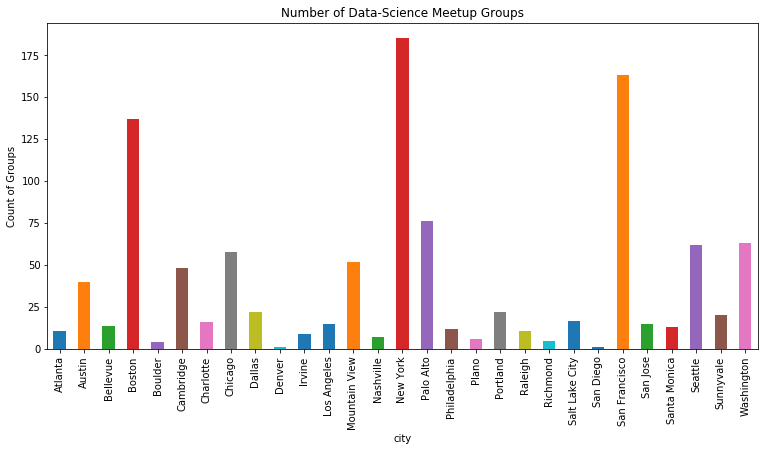

In [6]:
plot_meetups_by_city('Data-Science')

# Machine Learning

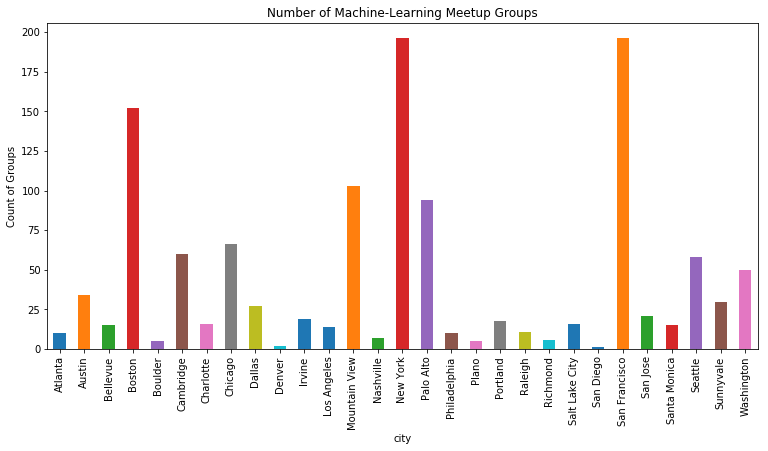

In [7]:
plot_meetups_by_city('Machine-Learning')

# Philosophy

In [8]:
plot_meetups_by_city('Philosophy')

HTTPError: HTTP Error 429: Too Many Requests

# Hiking

In [ ]:
plot_meetups_by_city('Hiking')

# Yoga

In [ ]:
plot_meetups_by_city('Yoga')

# Neuroscience

In [ ]:
plot_meetups_by_city('Neuroscience')

# Reading

In [ ]:
plot_meetups_by_city('Reading')

# Dancing

In [ ]:
plot_meetups_by_city('Dancing')

# Art

In [ ]:
plot_meetups_by_city('Art')

# Dogs

In [ ]:
plot_meetups_by_city('Dogs')